<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/1_Representaci%C3%B3n_molecular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Herramientas quimioinformáticas para el diseño de fármacos*



---
Grupo DIFACQUIM

Elaborado por: Mari Luz Seseña y Fernanda Saldívar.

Contacto: fer.saldivarg@gmail.com

#**Introducción**
La adquisición y el análisis de bases de datos moleculares son tareas fundamentales en quimioinformatica y en aplicaciones de inteligencia artificial enfocadas a áreas como la ciencia de materiales y el diseño de fármacos. Actualmente, existen repositorios públicos como PubChem, CheMBL y Protein Data Bank que permiten el acceso a millones de compuestos con anotaciones de bioactividad y a estructuras 3D de blancos moleculares. Analizar y obtener sentido de la información contenida en estos repositorios representa una oportunidad para realizar análisis inductivos y para la simulación de sistemas vivos.  En el diseño de fármacos, estos datos han permitido entrenar modelos para la predicción de actividad/toxicidad de nuevos compuestos, para explorar las relaciones estructura-propiedad (actividad biológica) y para vincular objetivos biológicos con compuestos bioactivos, esto por mencionar algunos ejemplos. 




**Temas principales: :**

* Introducción a las representaciones moleculares más comunes de compuestos orgánicos de bajo peso molecular y a sus aplicaciones en diversos contextos.
* Introducción al uso de las paqueterías de quimioinformática para el manejo de estructuras y reacciones químicas. Se aplicarán conocimientos de quimioinformática y programación para comparar estructuras, filtrar bases de datos y visualizar moléculas con características específicas.
* Los asistentes aprenderán a acceder a repositorios públicos de datos quimico-biológicos como ChEMBL, PubChem y Protein Data Bank mediante programación.
* Conocerán el tipo de información y búsquedas que brindan los repositorios públicos de compuestos químicos.
* Conocerán y aplicarán técnicas para la visualización y el análisis del espacio químico.






---


# 1. Representación Molecular

Codificación de una estructura química en una forma comprensible para un programa de computadora.

* **Representaciones 2D**: Representaciones más utilizadas en la enseñanza de la química.


* **Representaciones 3D**: Son ampliamente utilizados en estudios de modelado molecular.

   Ocupan mucho espacio de almacenamiento. No es ideal para muchas moléculas.


* **Notaciones lineales**: Son descripciones alfanuméricas. Se utiliza para ahorrar espacio de memoria, almacenamiento, gestión de datos y procesamiento de moléculas.
   * SMILES: Sistema simplificado de entrada de línea de entrada (SMILES). - 1988
   * SMARTS: SMILES especificaciones de objetivos arbitrarios (SMARTS).
   * InChikeys: Clave de identificación química internacional (InChI Keys).
   * SELFIES: cadenas incrustadas autorreferenciales.

* **Reacciones moleculares**: Para representar reacciones químicas es de particular importancia identificar los reactivos, productos, y si se quiere representar reacciones de manera más genérica, se requiere determinar el centro de reacción, es decir, el conjunto de átomos y enlaces que se modifican durante la reacción. Podemos usar SMILES para describir reacciones, SMARTS para consultas de reacciones y SMIRKS para describir transformaciones.

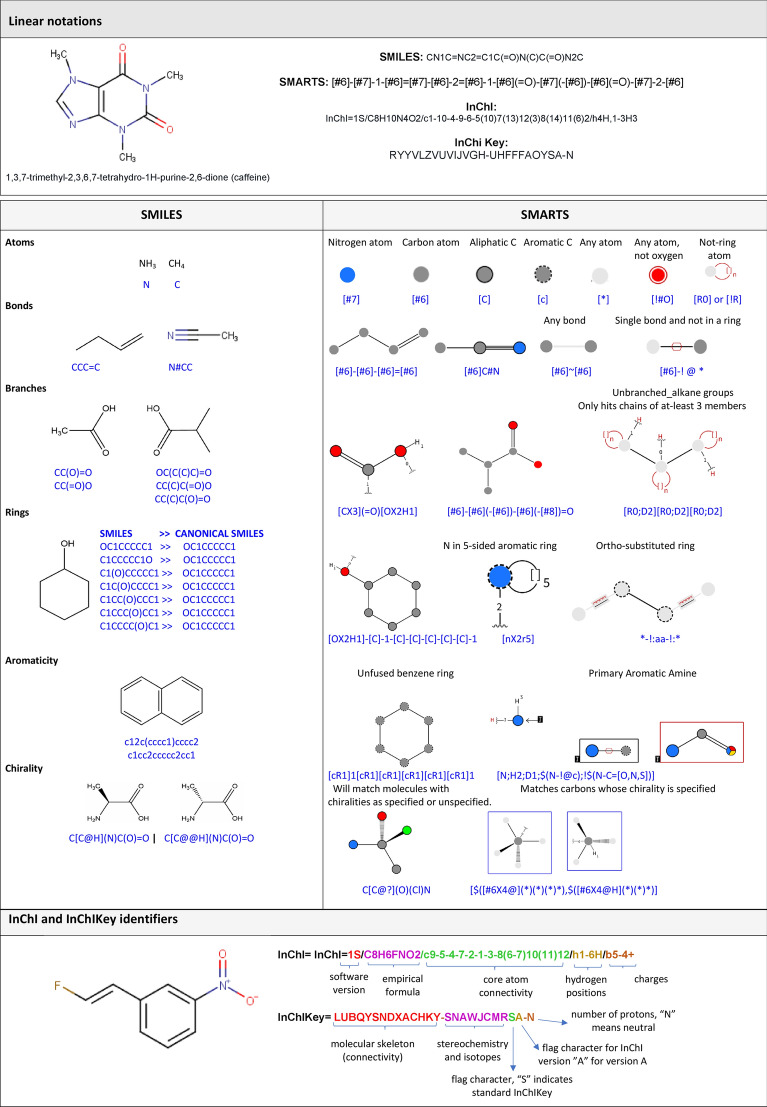

**Figura 1:** Conceptos SMILES, SMARTS, InChI and InChIKey. Se proporcionan ejemplos para la ilustración de las reglas de sintaxis básicas SMILES, SMARTS, InChI e InChIKey. Las representaciones SMARTS se realizaron en [SMARTviewer](https://smarts.plus/). Los identificadores InChI e InChIKey se muestran para cafeína y el 1-[(E)-2-fluorovinil]-3-nitrobenzeno. Referencia: [Saldivar-González et al. 2020](https://jcheminf.biomedcentral.com/articles/10.1186/s13321-020-00466-z).



---



### Ejercicios




Intalar paqueterias y módulos necesarios

In [ ]:
!pip install rdkit #Librería de Quimioinformática

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 57.0 MB/s eta 0:00:00


In [ ]:
!pip install py3Dmol # Visualización 3D

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install faerun-notebook==0.1.5b0 #Dibujar reacciones 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.0/535.0 kB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
  Created wheel for faerun-notebook: filename=faerun_notebook-0.1.5b0-py2.py3-none-any.whl size=470157 sha256=b1ae20e4e2cc7af8322793ed97c9c44e3da6a7bdcaf16f14c6f6a677e662d53b
  Stored in directory: /root/.cache/pip/wheels/92/d6/0e/c24e55ea7bb33143c61a11fb03b609cff740f24875d0bf4fad
Successfully built faerun-notebook


In [ ]:
!pip install SELFIES # Librería para usar la representación molucular de SELFIES

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importar librerías y módulos a utilizar
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdDepictor
from IPython.display import Image
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdDepictor
import py3Dmol
import requests
import urllib
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
from rdkit.Chem import AllChem
from itertools import chain
output.enable_custom_widget_manager()
from pathlib import Path
HERE = Path(_dh[-1])
DATA = HERE / "data"

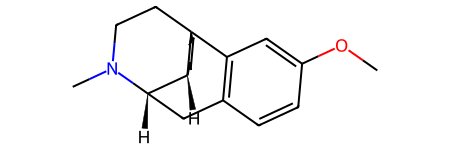

In [ ]:
#2D visualization
d = Chem.MolFromSmiles('[H][C@]12CCCC[C@]11CCN(C)[C@H]2CC2=C1C=C(OC)C=C2')
d

In [ ]:
# 3D visualization
ps = rdDistGeom.ETKDGv3()
ps.clearConfs= False
cid = rdDistGeom.EmbedMolecule(d,ps)

v = py3Dmol.view(width=300,height=300)
v.removeAllModels()
IPythonConsole.addMolToView(d,v,confId=cid)
v.zoomTo()
v.show()

[19:55:34] Molecule does not have explicit Hs. Consider calling AddHs()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Nota: El módulo `rdDistGeom` coordina computacionalmente átomos en 3D usando geometría, y el argumento `clearConfs` borra todas las conformaciones existentes de la molécula.

In [ ]:
#mol a SMARTS
Chem.MolToSmarts(d)

'[#6]1-[#6@H]2-[#6@]3(-[#6]-[#6]-[#6]-1)-[#6]-[#6]-[#7](-[#6])-[#6@H]-2-[#6]-[#6]1:[#6]-3:[#6]:[#6](-[#8]-[#6]):[#6]:[#6]:1'

In [ ]:
#Mol a InChiKey
Chem.MolToInchiKey(d)

'MKXZASYAUGDDCJ-NJAFHUGGSA-N'

In [ ]:
#mol a SMILES
Chem.MolToSmiles(d)


'COc1ccc2c(c1)[C@]13CCCC[C@@H]1[C@H](C2)N(C)CC3'

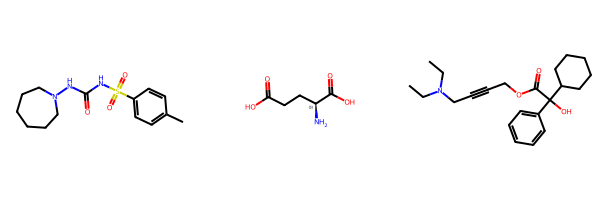

In [ ]:
#Hacer una lista con SMILES

smiles_list = ['CC1=CC=C(C=C1)S(=O)(=O)NC(=O)NN1CCCCCC1', 'N[C@@H](CCC(O)=O)C(O)=O', 'CCN(CC)CC#CCOC(=O)C(O)(C1CCCCC1)C1=CC=CC=C1']

mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
  
img = Draw.MolsToGridImage(mol_list)
img

In [ ]:
#SELFIES a partir de SMILES
import selfies as sf
smiles = "COc1ccc2c(c1)[C@]13CCCC[C@@H]1[C@H](C2)N(C)CC3" 
encoded_selfies = sf.encoder(smiles)  # SMILES --> SEFLIES
decoded_smiles = sf.decoder(encoded_selfies)  # SELFIES --> SMILES

print(f"Original SMILES: {smiles}")
print(f"Translated SELFIES: {encoded_selfies}")
print(f"Translated SMILES: {decoded_smiles}")

Original SMILES: COc1ccc2c(c1)[C@]13CCCC[C@@H]1[C@H](C2)N(C)CC3
Translated SELFIES: [C][O][C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][=Branch1][C@][C][C][C][C][C@@H1][Ring1][=Branch1][C@H1][Branch1][Ring2][C][Ring1][O][N][Branch1][C][C][C][C][Ring1][N]
Translated SMILES: COC1=CC=C2C(=C1)[C@]34CCCC[C@@H1]3[C@H1](C2)N(C)CC4


Nota: Al comparar las SMILES originales y decodificadas, no utilice la igualdad ==

Utilice RDKit para comprobar si ambas SMILES corresponden a la misma molécula.

In [ ]:
print(f"== Equals: {smiles == decoded_smiles}")

# Recomended
can_smiles = Chem.CanonSmiles(smiles)
can_decoded_smiles = Chem.CanonSmiles(decoded_smiles)
print(f"RDKit Equals: {can_smiles == can_decoded_smiles}")

== Equals: False
RDKit Equals: True


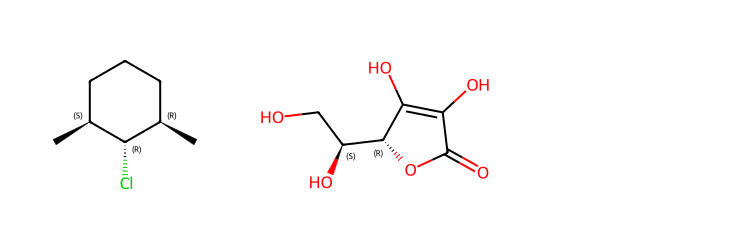

In [ ]:
#Agregar estereoquímica
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addStereoAnnotation = True

m1 = Chem.MolFromSmiles('C[C@H]1CCC[C@@H](C)[C@@H]1Cl')
m2 = Chem.MolFromSmiles('[H][C@@]1(OC(=O)C(O)=C1O)[C@@H](O)CO')

Draw.MolsToGridImage((m1,m2), subImgSize=(250,250))

In [ ]:
# Unwanted substructures  
from rdkit.Chem.FilterCatalog import FilterCatalog, FilterCatalogParams

params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS_A)

catalog = FilterCatalog(params)
mol = Chem.MolFromSmiles('O=C(Cn1cnc2c1c(=O)n(C)c(=O)n2C)N/N=C/c1c(O)ccc2c1cccc2')
entry = catalog.GetFirstMatch(mol)
print (entry.GetProp('Scope'))
print (entry.GetDescription())


PAINS filters (family A)
hzone_phenol_A(479)


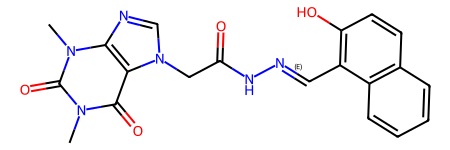

In [ ]:
mol

Note: To read more about PAINS, see the following reference [*J. Med. Chem.* 2010, 53, 7, 2719–2740](https://pubs.acs.org/doi/10.1021/jm901137j)

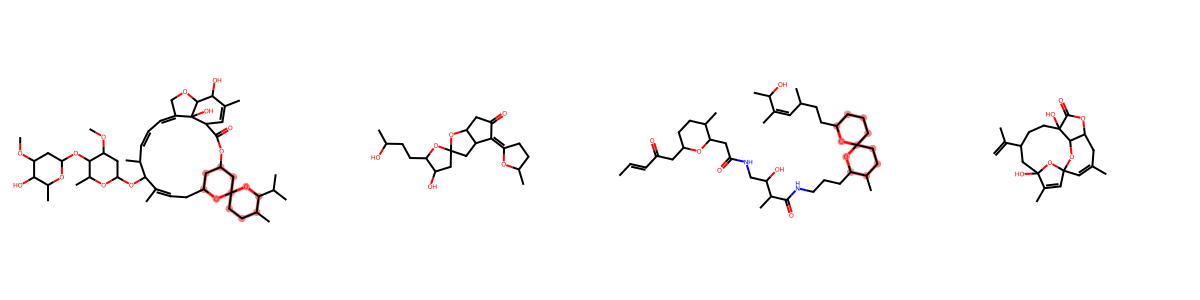

In [ ]:

# Encuentra subestructuras en una lista de moléculas usando SMARTS

smiles_list = ['CC1CCC2(CC3CC(O2)CC=C(C(C(C=CC=C4COC5C4(C(C=C(C5O)C)C(=O)O3)O)C)OC6CC(C(C(O6)C)OC7CC(C(C(O7)C)O)OC)OC)C)OC1C(C)C', 'CC1CCC(=C2C3CC4(CC(C(O4)CCC(C)O)O)OC3CC2=O)O1','CC=CC(=O)CC1CCC(C(O1)CC(=O)NCC(C(C)C(=O)NCCCC2C(CCC3(O2)CCCC(O3)CCC(C)C=C(C)C(C)O)C)O)C', 'CC1=CC23C=C(C(O2)(CC(CCC4(C(O3)C(C1)OC4=O)O)C(=C)C)O)C'] 

mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
  
pattern = Chem.MolFromSmarts ('[*]~1~[*]~[*]C2([*]~[*]~[*]~[#6]-[#8]2)[#8]-[#6]~1') #spiroacetal [6,6] (SMARTS que quiero identificar)

img = Draw.MolsToGridImage( mol_list, subImgSize=(300,300), molsPerRow=4, highlightAtomLists=[ mol.GetSubstructMatch(pattern) for mol in mol_list], useSVG=True )
img



Nota: Para leer más sobre el papel biológico de los acetales bicíclicos, consulte la siguiente referencia [Org. Biomol. Chem., 2019, 17, 1037–1052](https://pubs.rsc.org/en/content/articlelanding/2018/ob/c8ob02808g/unauth).

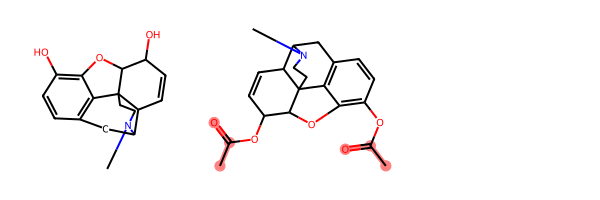

In [ ]:
#Comparar moléculas

mol1 = Chem.MolFromSmiles('CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O')
mol2 = Chem.MolFromSmiles('CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)CCN3C')

def view_difference(mol1, mol2):
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return Draw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])

view_difference(mol1,mol2)

Note: useful for the analysis of structural analogs and in drug optimization processes [ACS Omega 2019, 4, 1, 1027–1032](https://pubs.acs.org/doi/10.1021/acsomega.8b03390)

In [ ]:
# Molecular reaction representation
SmilesDrawer(value=[
    ("Condensación aldólica", "C1=CC=C(C=C1)C=O.CC(=O)C>>C1=CC=C(C=C1)C=CC(=O)C=CC2=CC=CC=C2"), #"Title", "Reactant 1"."Reactanct2" >> "Product"
    ("Ácido tereftálico", "C1=CC(=CC=C1C(=O)O)C(=O)O"), 
    ("Molécula", "CNCNCCN")
], theme='dark', background="#1e1e1e", options={'scale': 1.25, 'bondThickness': 1.5})


SmilesDrawer(background='#1e1e1e', options={'scale': 1.25, 'bondThickness': 1.5}, theme='dark', value=[('Conde…

In [ ]:
#Cambiar grosor de líneas

SmilesDrawer(value="C1=CC=C(C=C1)C=O.CC(=O)C>>C1=CC=C(C=C1)C=CC(=O)C=CC2=CC=CC=C2", theme='matrix', background="#000000", options={'scale': 1.5, 'bondThickness': 2.5})

SmilesDrawer(background='#000000', options={'scale': 1.5, 'bondThickness': 2.5}, theme='matrix', value='C1=CC=…

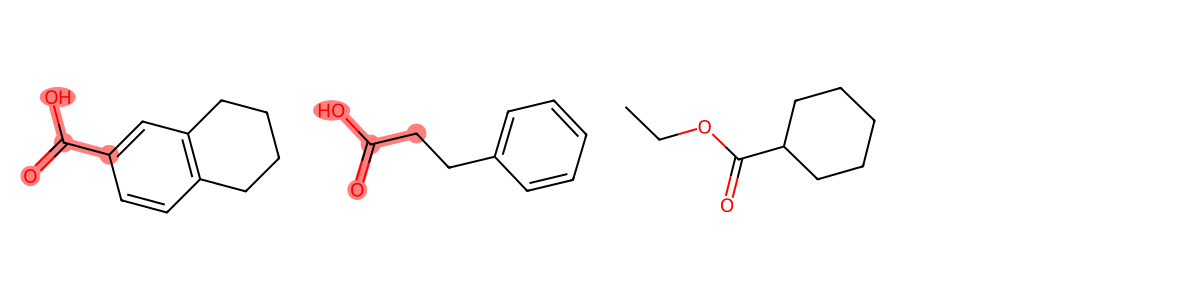

In [ ]:
# SMIRKS Transformaciones Químicas 

#Revisar que el SMARTS sea correcto y recupere unicamente los compuestos que queremos transformar 

smiles_list = ['OC(=O)C1=CC2=C(CCCC2)C=C1', 'OC(=O)CCC1=CC=CC=C1','CCOC(=O)C1CCCCC1']

mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
  
pattern = Chem.MolFromSmarts ('[#8;D1]-[#6:2](-[*:1])=O') #Carboxilic acid  

img = Draw.MolsToGridImage( mol_list, subImgSize=(300,300), molsPerRow=4, highlightAtomLists=[mol.GetSubstructMatch(pattern) for mol in mol_list], useSVG=True )
img




Visualizar el SMIRKS que se va a trbajar para transformar los compuestos 

In [ ]:
#Visualizar detalles del SMARTS usado
from IPython.display import Image
import requests
import urllib

In [ ]:
baseurl = "https://smarts.plus/rails/active_storage/blobs/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBBOEl6Q1E9PSIsImV4cCI6bnVsbCwicHVyIjoiYmxvYl9pZCJ9fQ==--54e7331ce02650b8cd5a914030fed428eef81003/smartsview.png"

In [ ]:
def get_img(query):
    url = baseurl+query
    res = requests.get(url)
    return Image(res.content)

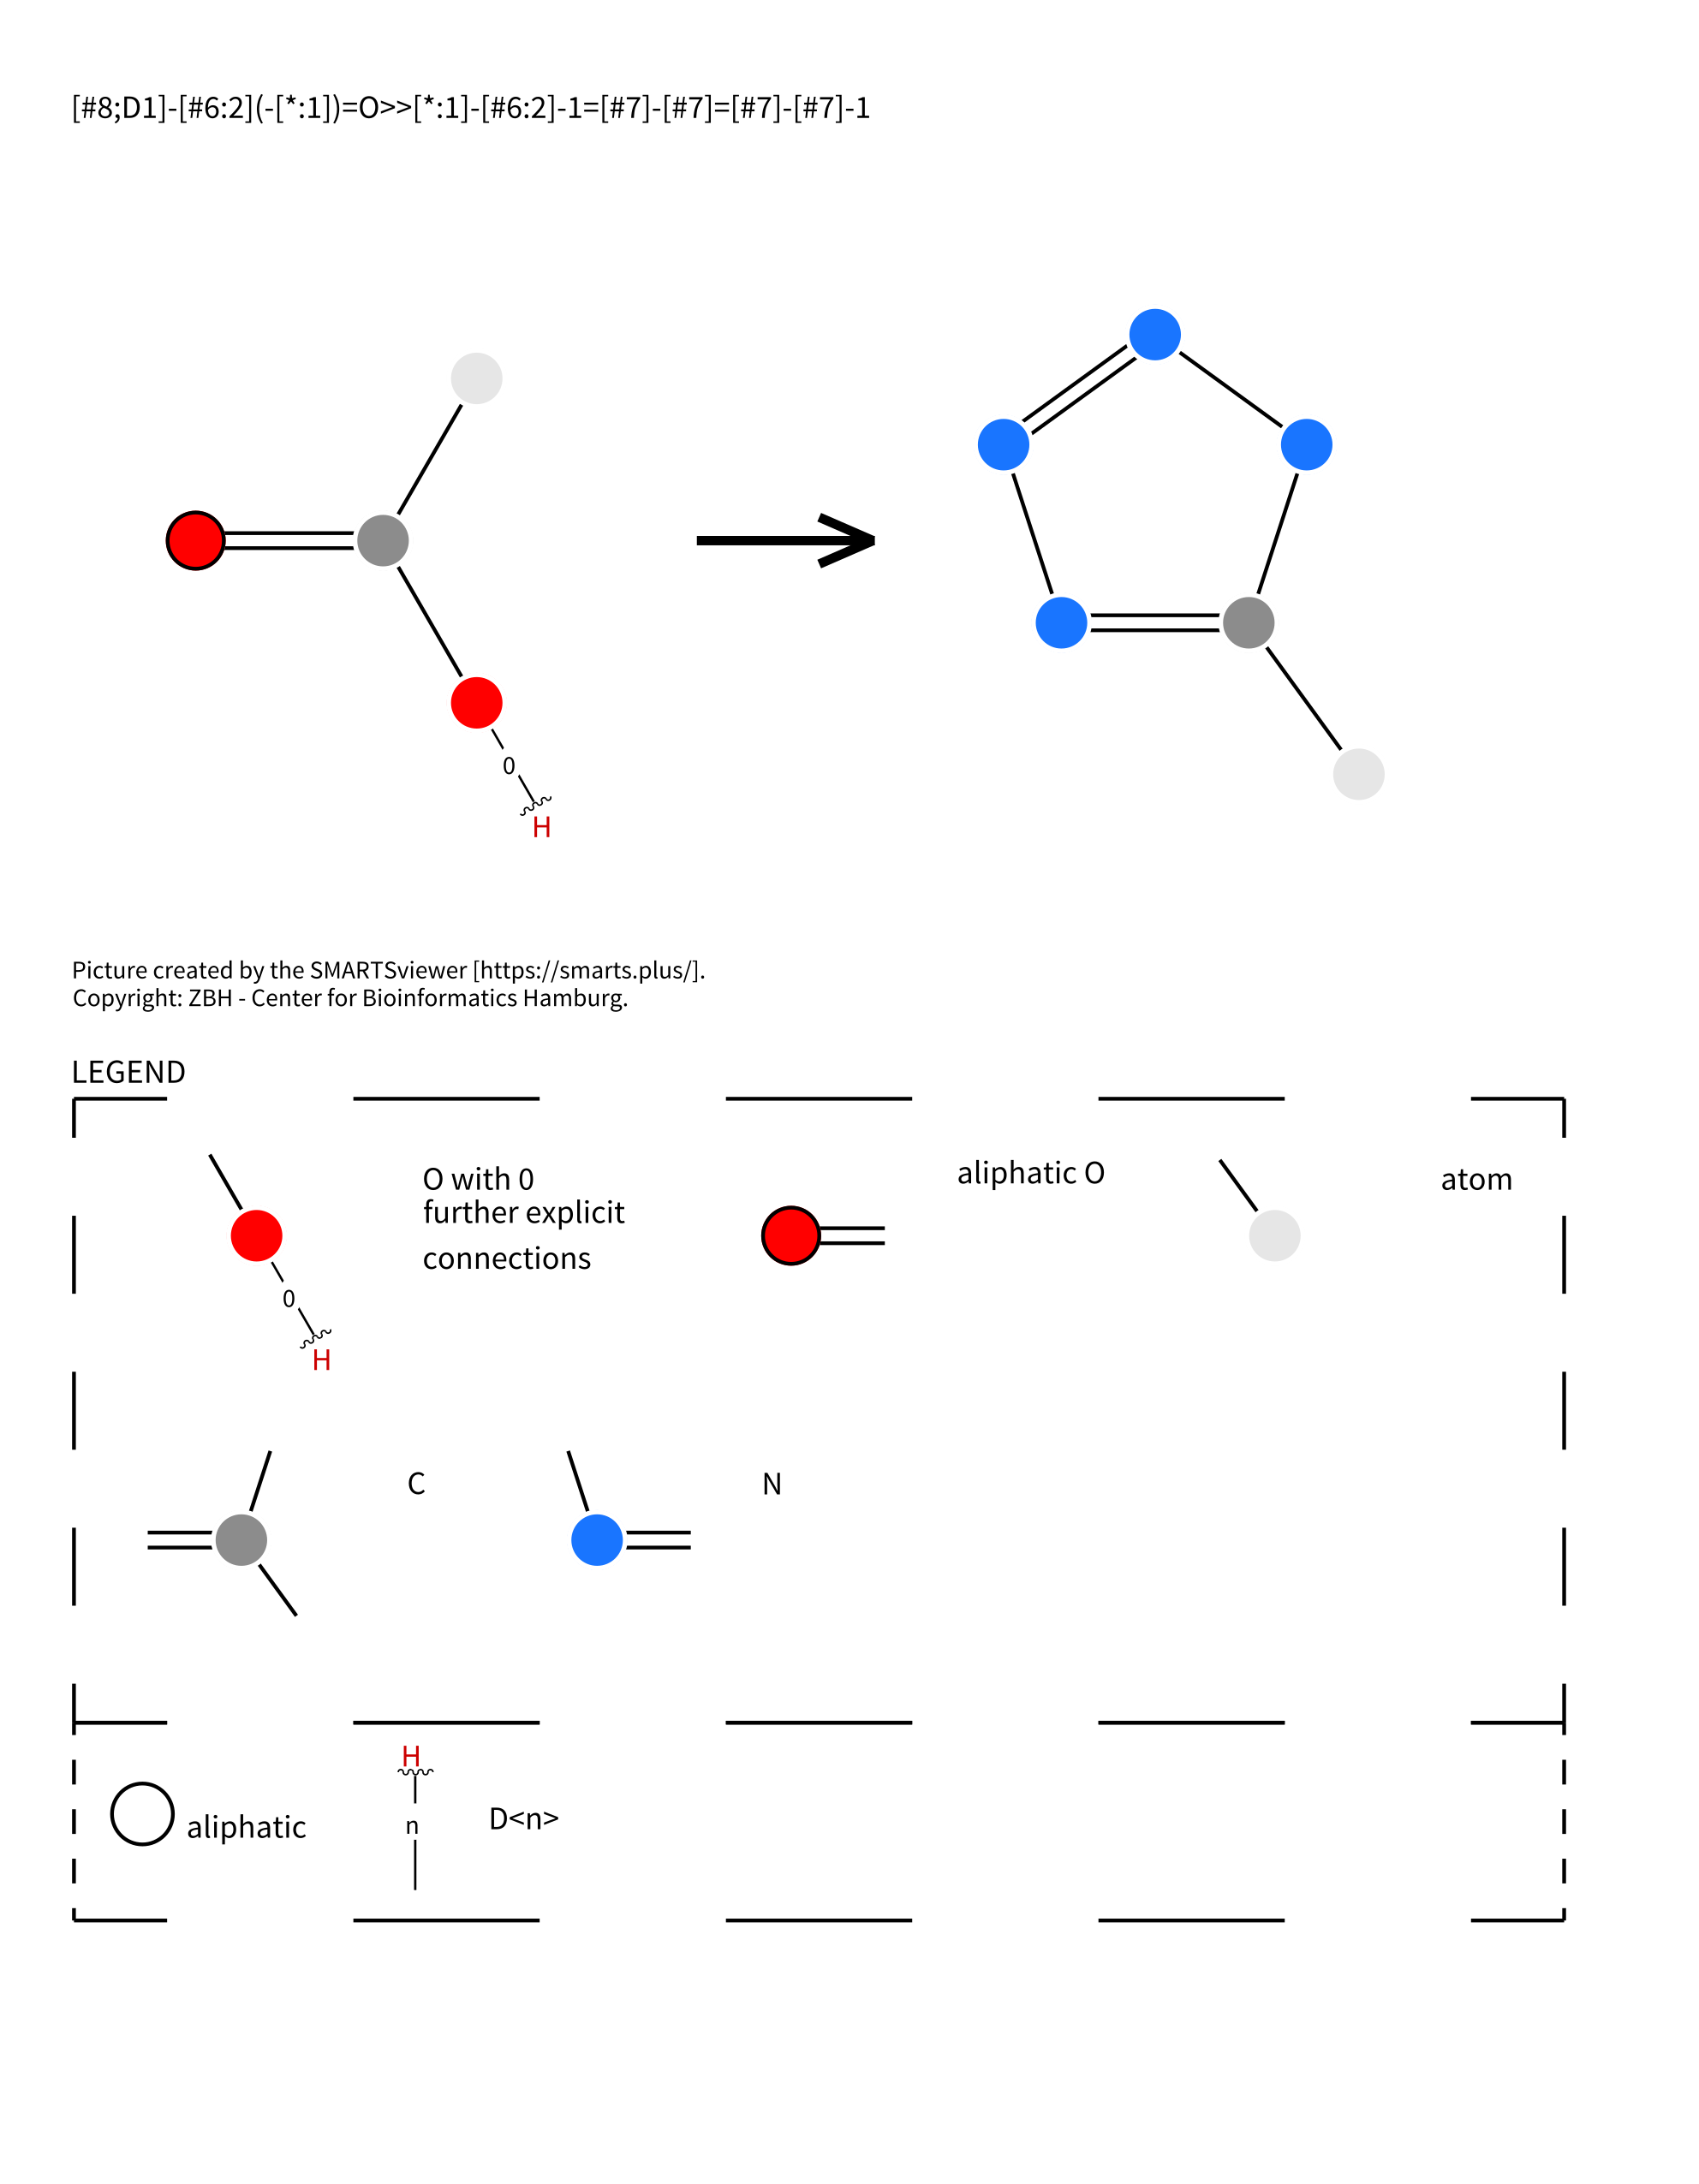

In [ ]:
im1 = get_img("smarts = [#8;D1]-[#6:2](-[*:1])=O>>[*:1]-[#6:2]-1=[#7]-[#7]=[#7]-[#7]-1")
im1

Number of unique product sets: 2


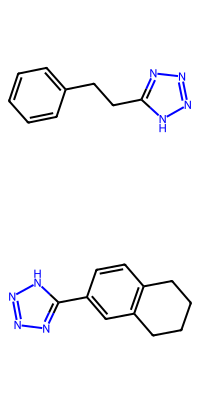

In [ ]:
#Ácido carboxilico a tetrazole
def to_smiles(mol_tuple):
    return tuple(Chem.MolToSmiles(mol) for mol in mol_tuple)

def from_smiles(smiles_tuple):
    return tuple(Chem.MolFromSmiles(smiles) for smiles in smiles_tuple)

carboxylic_acid_to_tetrazole_smarts = '[#8;D1]-[#6:2](-[*:1])=O>>[*:1]-[#6:2]-1=[#7]-[#7]=[#7]-[#7]-1'  #SMIRKS  
carboxylic_acid_to_tetrazole = AllChem.ReactionFromSmarts(carboxylic_acid_to_tetrazole_smarts)

# do the reaction on every alcohol in our set
all_products_tuples = [carboxylic_acid_to_tetrazole.RunReactants((mol, )) for mol in mol_list]
all_products = chain.from_iterable(all_products_tuples)
all_products_smiles = [to_smiles(mol_tuple) for mol_tuple in all_products]
all_products_unique = [from_smiles(smiles_tuple) for smiles_tuple in set(all_products_smiles)]
nProductSets = len(all_products_unique)
print("Number of unique product sets:",nProductSets)
# draw each product set on its own line
prod_tpl = tuple(chain(*all_products_unique))
img= Draw.MolsToGridImage(prod_tpl,molsPerRow=carboxylic_acid_to_tetrazole.GetNumProductTemplates())
img

**References:**

* Saldívar-González, F.I., Huerta-García, C.S. & Medina-Franco, J.L. (2020) Chemoinformatics‐based enumeration of chemical libraries: a tutorial. *J.Cheminform.* 12,64.
* Universität Hamburg (s/f) SMARTSviewer and SMARTScompareViewer automatic visualization retrieving. Recuperado el 22 de junio del 2022 de: https://smarts.plus/rest.
* Iwatobipen (2022) Easy way to visualiza SMARTS. Recuperado el 23 de junio del 2022 de: https://iwatobipen.wordpress.com/2022/02/14/easy-way-to-visualize-smarts-chemoinformatics-memo/.

* Landrum, G. (2021) Getting Started with de RDKit in Python. Recuperado el 21 de junio del 2022 de: https://www.rdkit.org/docs/GettingStartedInPython.html.

* Landrum, G. (2021) RDKit Cookbook. Recuperado el 21 de junio del 2022 de: https://www.rdkit.org/docs/Cookbook.html.

* Probst, D. & Reymond, JL. (2018) SmilesDrawer: Parsing and Drawing SMILES-Encoded Molecular Structures Using Client-Side JavaScript. *J. Cheminform.* 58 (1), 1-7.

* Daylight Chemical Information Systems (2006) Daylight Theory Manual. Recuperado el 26 de junio del 2022 de: https://www.ics.uci.edu/~dock/manuals/DaylightTheoryManual/index.html.

* Daylight Chemical Information Systems (2019) SMARTS - A Language for Describing Molecular Patterns. Recuperado el 28 de junio del 2022 de: https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html.

* Py3Dmol in Jupyter (2019). Recuperado el 5 de agosto de https://birdlet.github.io/2019/10/02/py3dmol_example/.